In [30]:
#Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [31]:
df = pd.read_csv('data/stud.csv')

In [32]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [40]:
X = df.drop(columns=['math_score'],axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [34]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [41]:
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [42]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

ss = StandardScaler()
oe = OneHotEncoder()
preprocessing = ColumnTransformer([
    ('OneHotEncoder',oe,cat_features),
    ('StandardScaler',ss,num_features)
]) 

In [43]:
X = preprocessing.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [44]:
X.shape

(1000, 19)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=0)
X_train.shape, X_test.shape

((200, 19), (800, 19))

In [46]:
def evaluate_model(true,pred):
    mae = mean_absolute_error(true,pred)
    mse = mean_squared_error(true,pred)
    rmse = np.sqrt(mse)
    r2Score = r2_score(true,pred)
    return mae, rmse, r2Score 

In [47]:
models = {
    'Linear Regression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'K-Neighbours Regression' : KNeighborsRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'AdaBoostRegression' : AdaBoostRegressor(),
    'CatBoostRegressor' : CatBoostRegressor(verbose=False),
    'XGBRegressor' : XGBRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')



Linear Regression
Model performance for Training set
- Root Mean Squared Error: 4.8444
- Mean Absolute Error: 3.9079
- R2 Score: 0.8978
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6759
- Mean Absolute Error: 4.5070
- R2 Score: 0.8594


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.2761
- Mean Absolute Error: 4.8877
- R2 Score: 0.8284
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.6030
- Mean Absolute Error: 5.2275
- R2 Score: 0.8097


Ridge
Model performance for Training set
- Root Mean Squared Error: 4.8492
- Mean Absolute Error: 3.9019
- R2 Score: 0.8976
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6486
- Mean Absolute Error: 4.4830
- R2 Score: 0.8608


K-Neighbours Regression
Model performance for Training set
- Root Mean Squared Error: 6.4205
- Mean Absolute Error: 5.0590
- R2 Score: 0.8205
---------------------

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.860756
0,Linear Regression,0.859403
5,RandomForestRegressor,0.827596
7,CatBoostRegressor,0.825595
1,Lasso,0.809724
6,AdaBoostRegression,0.796832
8,XGBRegressor,0.782368
3,K-Neighbours Regression,0.763914
4,Decision Tree,0.688154


In [49]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 85.94


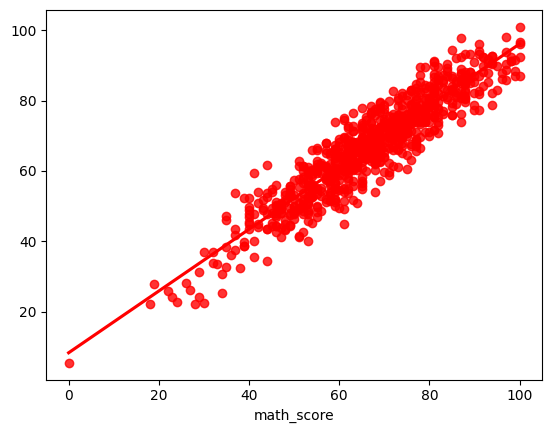

In [50]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [51]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df


,Actual Value,Predicted Value,Difference
993,62,64.227935,-2.227935
859,87,76.158167,10.841833
298,40,48.935863,-8.935863
553,77,68.460990,8.539010
672,69,69.846124,-0.846124
...,...,...,...
117,78,73.410486,4.589514
464,75,60.483581,14.516419
25,73,72.115323,0.884677
110,77,81.310708,-4.310708
